# <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Cohort Analysis for Customer Retention in E-Commerce</div></b>

In this project, I delved into Cohort Analysis to gain a deeper understanding of customer behavior. This analytical approach enabled me to segment customers into cohorts based on their purchase behavior over time, which was instrumental in identifying key retention opportunities and optimizing marketing efforts. By analyzing these cohorts, I developed strategies that helped businesses improve customer engagement and increase the effectiveness of their marketing campaigns.

## Introduction
 
Cohort analysis is a powerful analytical technique that involves dividing users into distinct groups, or **cohorts**, based on shared characteristics or experiences, such as their acquisition date. This method allows businesses to track customer behavior, engagement, and retention over time.

For example, an e-commerce platform may define cohorts based on the month users first signed up. By monitoring how each cohort interacts with the platform over time, businesses can gain valuable insights into customer retention, conversion rates, and lifetime value.

#### Importance of Cohort Analysis
Cohort analysis is essential for understanding customer retention patterns and making data-driven business decisions. Key benefits include:  

- **Identifying retention trends**: Tracks how different customer groups retain over time.  
- **Detecting churn patterns**: Pinpoints when and why customers stop engaging.  
- **Evaluating marketing efforts**: Measures the effectiveness of customer acquisition strategies.  
- **Optimizing business strategies**: Helps refine marketing, product development, and customer support initiatives.

#### Retention Rate Time-Based Cohort Analysis
This specialized approach to cohort analysis focuses on **user retention across different time periods** by:  

1. Creating cohorts based on user acquisition dates.  
2. Measuring the percentage of users from each cohort who remain engaged over time (e.g., after 1 month, 3 months, etc.).  
3. Analyzing how retention rates vary across different cohorts and identifying patterns that impact long-term customer engagement.

#### Business Problem/Problem Statement
**E-Shop Pro**, a growing e-commerce company, faces a critical challenge: declining customer retention rates. While the company has successfully acquired new customers through aggressive marketing, it struggles to keep them engaged long-term.  

Despite collecting large volumes of customer data, **E-Shop Pro has not effectively leveraged analytics to understand customer behavior and retention patterns**. This represents a missed opportunity for improving customer loyalty and lifetime value.

#### Project Objectives  
The primary goal of this project is to conduct a **time-based cohort analysis** to assess customer retention. Specific objectives include:

1. **Retention Rate Analysis**: Calculate and analyze retention rates for different customer cohorts over time.  
2. **Cohort Segmentation**: Group customers into distinct cohorts based on acquisition date or first purchase.  
3. **Identify Retention Trends**: Detect behavioral patterns that influence customer retention.  
4. **Churn Analysis**: Determine when and why customers disengage from the platform.  
5. **Recommendation Strategies**: Develop data-driven strategies to improve customer retention.

### Import Libraries

In [76]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Load Dataset

In [2]:
# Loading the dataset
data = pd.read_csv("cohort_data.csv", encoding='latin-1')

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


**Data Description**

1. **InvoiceNo**: A unique identifier for each invoice or transaction, often used for tracking and reference purposes.

2. **StockCode**: A code or identifier associated with a specific product or item in the e-commerce store's inventory, used for cataloging and tracking purposes.

3. **Description**: A categorical feature that provides a brief textual description of the product or item being sold, offering clarity to customers about what they are purchasing.

4. **Quantity**: The quantity or number of units of a product that were included in the transaction, indicating the purchase volume for each item.

5. **InvoiceDate**: The date and time when the transaction or invoice was generated, offering insights into when purchases were made and allowing for temporal analysis.

6. **UnitPrice**: Indicating the total cost of the items purchased.

7. **CustomerID**: A unique identifier associated with each customer or shopper, allowing for customer-specific analysis and tracking of individual purchasing behavior.

8. **Country**: The name of the country where the customer is located or where the transaction occurred.

This data description provides an overview of the key data elements available in the dataset, which can be used to conduct the retention rate time-based cohort analysis mentioned in the project objectives.

### Data Cleaning & Preprocessing

In [3]:
# Display basic information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Initial Observations:**
- Dataset Size: 541,909 rows and 8 columns.
- Missing Data: The CustomerID column has missing values (only 406,829 non-null values).

**Data Types:**
- InvoiceDate is currently an object and should be converted to a datetime format.
- CustomerID is a float, but it should likely be an integer or categorical ID.

Next, I'll clean and preprocess the data by:

- Converting InvoiceDate to datetime format.
- Handling missing values in CustomerID.
- Checking for negative values in Quantity (possible returns).
- Identifying duplicate or anomalous transactions.

In [10]:
# Summary statistics for numerical columns
summary_stats = data.describe()

summary_stats

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


**Observations Based on the Summary Statistics**  

1. **Quantity Distribution Issues**:  
   - The **minimum quantity is -80,995**, indicating a high number of returns or incorrect data entries.  
   - The **maximum quantity is 80,995**, suggesting some very large purchases.  
   - The **mean quantity is 12.06**, but the **standard deviation is 248.69**, indicating a highly skewed distribution with extreme values.  

2. **Invoice Date Range**:  
   - The dataset spans from **2010-12-01 to 2011-12-09**, covering approximately one year.  
   - The presence of timestamp values suggests transaction-level data.  

3. **Unit Price Anomalies**:  
   - The **minimum unit price is 0.00**, which could indicate promotional or free items, missing data, or incorrect entries.  
   - The **maximum unit price is 38,970**, which is significantly higher than the 75th percentile (3.75), suggesting outliers or luxury/high-value items.  
   - The **mean unit price is 3.46**, which is relatively low, but the **standard deviation is 69.31**, reinforcing the presence of extreme values.  

4. **CustomerID Analysis**:  
   - The **CustomerID ranges from 12,346 to 18,287**, implying a unique customer identifier.  
   - The **mean CustomerID is 15,287**, and the **standard deviation is 1,713**, suggesting an even distribution of customers.  

In [4]:
# Checking for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Count total number of duplicate rows
num_duplicates = data.duplicated().sum()
print("Total duplicate rows:", num_duplicates)

# Display duplicate rows
df_duplicates = data[data.duplicated()]
print("Duplicate rows:")
print(df_duplicates)

# View duplicates based on a specific column (e.g., 'CustomerID')
df_customer_duplicates = data[data.duplicated(subset=['CustomerID'], keep=False)]
print("Duplicate rows based on 'CustomerID':")
print(df_customer_duplicates)


Total duplicate rows: 5268
Duplicate rows:
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         C

In [6]:
# Convert InvoiceDate to datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

# Drop rows where CustomerID is missing (since retention analysis requires customer tracking)
# We will drop rows hwere description is mising also since it contains small missing data points
data.dropna(inplace = True)

# Checking for negative values in Quantity (indicating returns)
negative_quantity = data[data["Quantity"] < 0]

# Checking for duplicate rows
duplicates = data.duplicated().sum()

# Display summary of detected issues
negative_quantity.shape[0], duplicates


(8905, 5225)

In [7]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Remove negative quantity rows (handling product returns separately if needed)
data_cleaned = data_cleaned[data_cleaned["Quantity"] >= 0]

# Verify changes
num_duplicates = data_cleaned.duplicated().sum()
negative_quantity_after = data_cleaned[data_cleaned["Quantity"] < 0].shape[0]

num_duplicates, negative_quantity_after, data_cleaned.shape

(0, 0, (392732, 8))

**Data Cleaning Summary:**

- Date Conversion: InvoiceDate successfully converted to datetime.
- CustomerID and Description Handling: Rows with missing data points in these two columns were removed.
- Negative Quantity: 8,905 rows have negative quantity (indicating product returns). We removed negative quantities since returns do not contribute to retention.
- Duplicate Rows: 5,225 duplicate rows found and removed.

## Cohort Analysis

Since we are carrying out a Time-based cohort analysis, the cohorts will be grouped according to the dates they made their first purchase
and Retention rate will be calculated by analyzing the months they stayed active after their first purchase

I'll now perform cohort analysis by:
- Defining cohorts based on customers' first purchase month.
- Calculating monthly retention rates to track how cohorts behave over time.
- Visualizing the retention matrix using a heatmap.

Let's start by extracting the first purchase date for each customer and creating the cohort table.

In [30]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [31]:
# create Invoice month as new feature
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [32]:
# Apply function to the InvoiceDate column
data_cleaned["InvoiceDate"]  = data_cleaned["InvoiceDate"].apply(get_month)

In [37]:
# create a function for cohort date
def get_cohort_date(data_cleaned):

    # assign the minimum date to all unique candidateID, i.e the first day they made a purchase
    data_cleaned["cohort date"] = data_cleaned.groupby("CustomerID")["InvoiceDate"].transform("min")
    return data_cleaned["cohort date"]

In [38]:
data_cleaned["cohort date"] = get_cohort_date(data_cleaned)

data_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-01,0.85,12680.0,France,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-01,2.10,12680.0,France,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-01,4.15,12680.0,France,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-01,4.15,12680.0,France,2011-08-01


### Create Cohort Index

A cohort index is a numerical representation that measures the time interval in months since a particular group (cohort) made their initial purchase. For example, an index of 4 indicates that this cohort made their first purchase four months ago.

This will be calculated by subtracing the time the customer made first purchase (cohort date) from the recent purchase time (invoice date)

In [43]:
# create a function that extracts the year and month from the first and last cohort date

def get_year_and_month(data_cleaned, col):
    """
    This function takes in the dataframe and column,
    and returns the month and year component for that column

    Variables:
    data = dataframe
    col = column
    month = month component
    year = year component"""

    month = data_cleaned[col].dt.month
    year = data_cleaned[col].dt.year
    return month, year

In [44]:
# apply the fucntion on cohort first date column
first_month, first_year = get_year_and_month(data_cleaned,"cohort date")

In [45]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort date, Length: 392732, dtype: int32

In [46]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort date, Length: 392732, dtype: int32

In [47]:
# apply the fucntion on cohort latest date column
latest_month, latest_year = get_year_and_month(data_cleaned,"InvoiceDate")

In [48]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 392732, dtype: int32

In [49]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 392732, dtype: int32

### Calculate Cohort Index

In [50]:
# write a function to calculate cohort index
def create_cohort_index(first_month, first_year, latest_month,latest_year):
    """
    This code creates takes in the first and latest month and year
    and returns the calculated period(in months) the customer has been active

    variables:
    first_month: first month the customer made purchase
    first_year: first year the customer made purchase

    latest_month: recent month the customer made purchase
    latest_year: recent year the customer made purchase

    index: The duration between first and latest purchase (in months)"""

    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff +1 # +1 is added because of customers who have been active for just 1 month
    return index

In [51]:
data_cleaned["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)

data_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort date,cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-01,0.85,12680.0,France,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-01,2.10,12680.0,France,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-01,4.15,12680.0,France,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-01,4.15,12680.0,France,2011-08-01,5


### Create a Pivot Table

To create a pivot table, first we need to know how many customers made a purchase each month after their first purchase
for example: How many customers from the September cohort made a purchase four months after their initial purchase in September?

In [52]:
# Create Cohort Table
cohort_info = data_cleaned.groupby(["cohort date","cohort_index"])["CustomerID"].nunique().reset_index()
cohort_info.rename(columns = {"CustomerID": "Number of customers"}, inplace = True)

cohort_info

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321
...,...,...,...
86,2011-10-01,2,86
87,2011-10-01,3,41
88,2011-11-01,1,324
89,2011-11-01,2,36


In [53]:
# create a pivot table

cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of customers")

# change index to understandable format
cohort_table.index = cohort_table.index.strftime('%B %Y')

cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
January 2011,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
February 2011,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
March 2011,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
April 2011,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
May 2011,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
June 2011,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


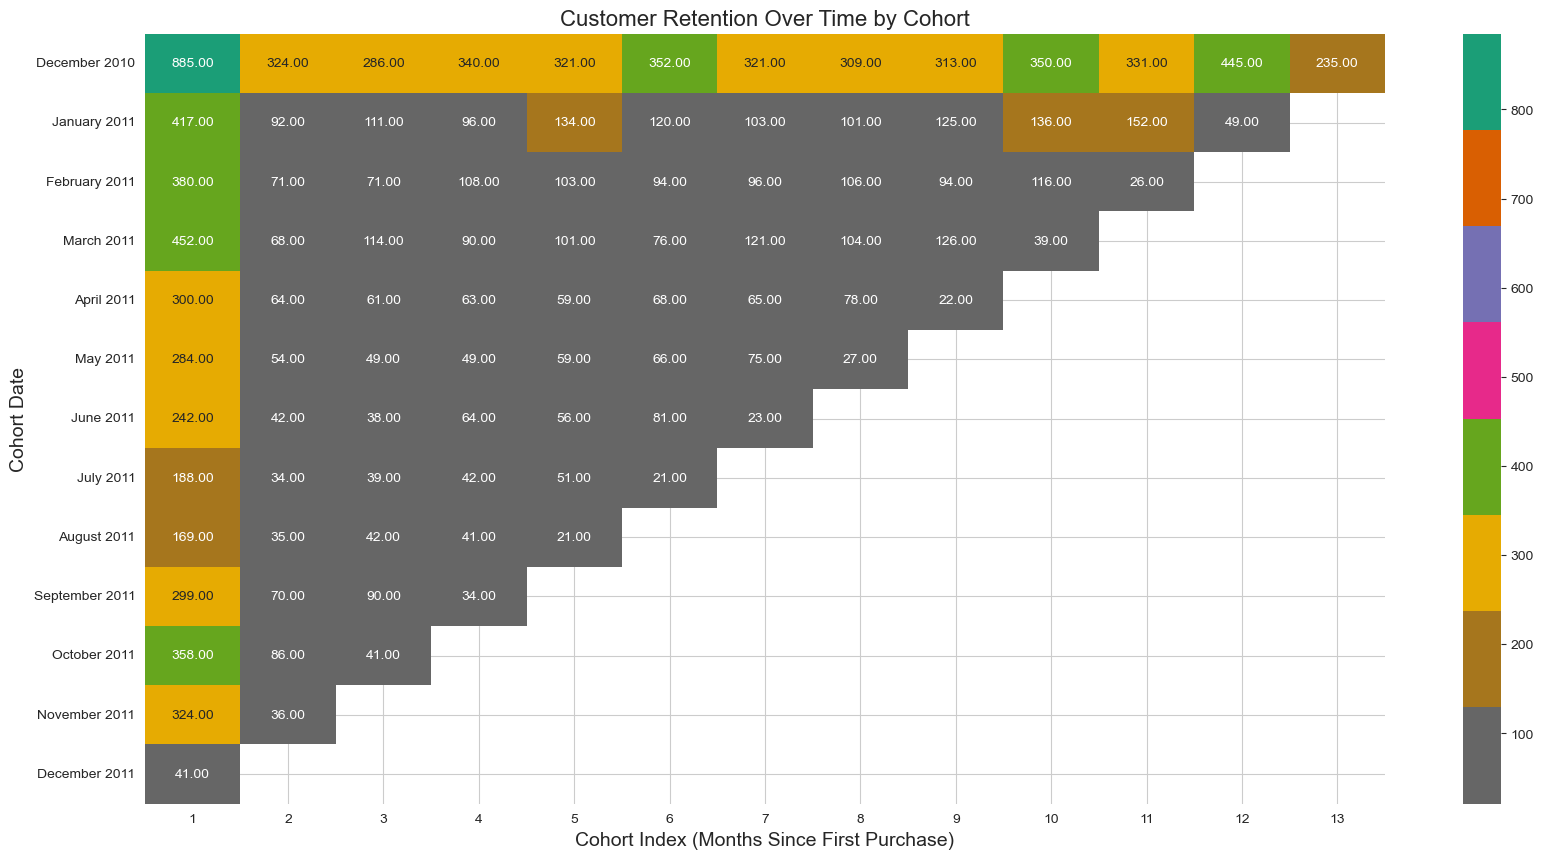

In [75]:
# Visualize Retention Rate as a Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(
    cohort_table, 
    annot=True, 
    fmt=".2f", 
    cmap="Dark2_r"
)

# Add titles and labels
plt.title("Customer Retention Over Time by Cohort", fontsize=16)
plt.xlabel("Cohort Index (Months Since First Purchase)", fontsize=14)
plt.ylabel("Cohort Date", fontsize=14)

# Display the heatmap
plt.show()


To effeciently observe the customers rentention rate, lets plot the chart in percentage.

In [55]:
# showing retention rate in percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
January 2011,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
February 2011,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
March 2011,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
April 2011,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
May 2011,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


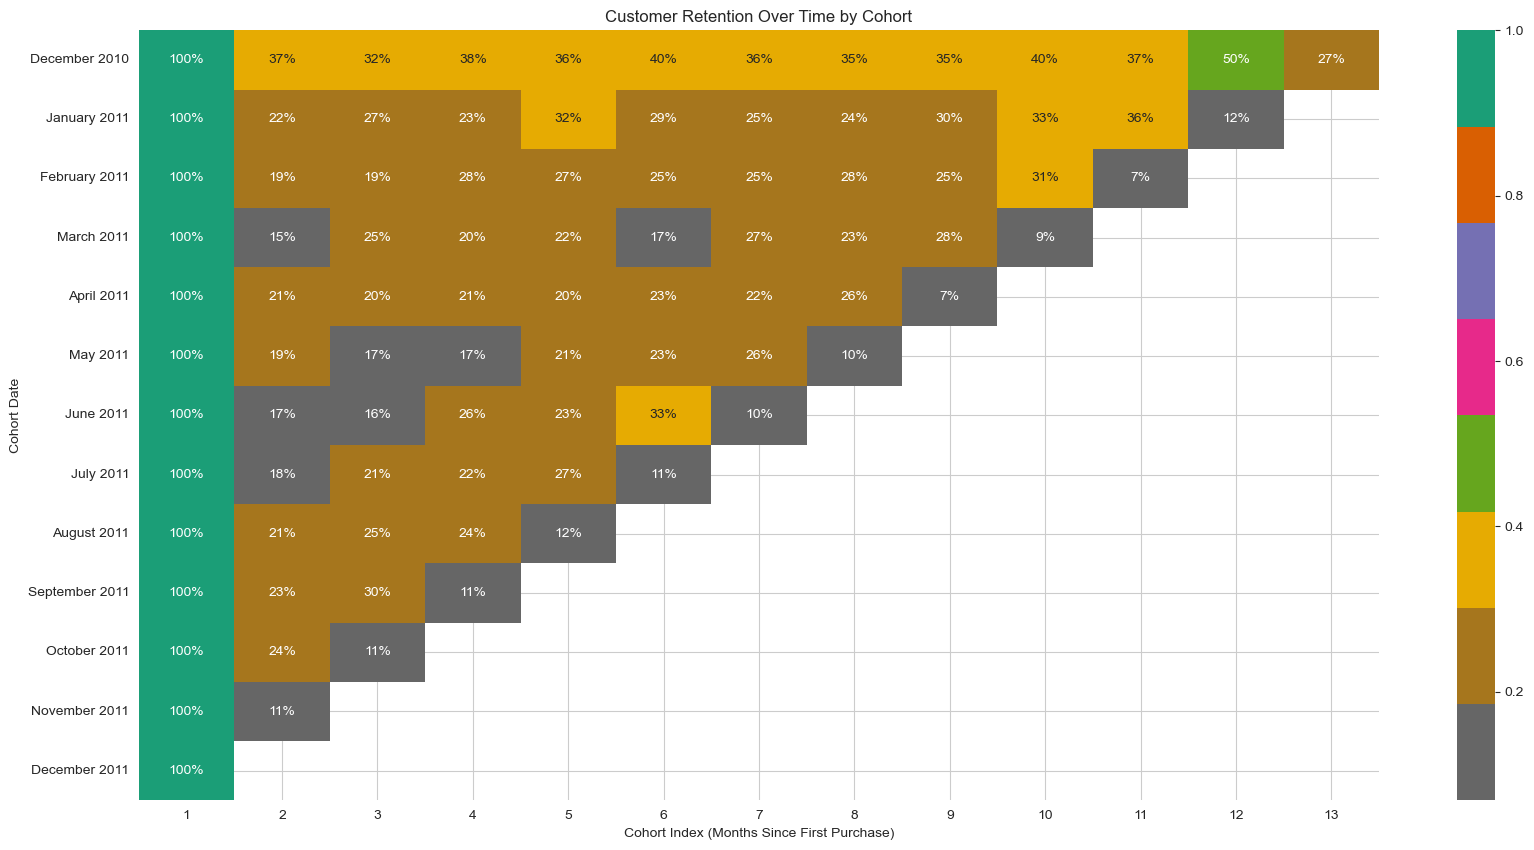

In [56]:
# Visualize retention rate in % as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(new_cohort_table, annot=True, fmt=".0%", cmap="Dark2_r")
plt.title("Customer Retention Over Time by Cohort")
plt.xlabel("Cohort Index (Months Since First Purchase)")
plt.ylabel("Cohort Date")

plt.show()

A healthy retention rate for e-commerce platforms is typically considered to be in the range of 20% to 40%. This means that 20% to 40% of your customers continue to make purchases from your e-commerce platform after their initial purchase.

#### Key Findings:
1. **Declining Retention Rates Over Time**: The graph shows a consistent decline in customer retention rates across all cohorts over the 13-month period. This indicates that customer churn is a significant challenge for the business.

2. **Cohort-Specific Retention Patterns**: The retention rates vary considerably between different customer cohorts. For example, the December 2010 cohort maintains much higher retention rates compared to the January 2011 and February 2011 cohorts.

3. **Early Churn is Prevalent**: The data suggests high levels of customer churn occurring within the first few months after the initial purchase, with retention rates dropping sharply in the first 3-4 months for most cohorts.

#### Notable Trends and Patterns:
- **Seasonal Fluctuations**: There appear to be some seasonal patterns, with slightly higher retention rates observed in the later months of the year (e.g., December) compared to the earlier months.
- **Cohort Sensitivity**: Newer customer cohorts tend to have lower overall retention rates compared to earlier cohorts, indicating the business may be struggling to retain newer customers.

#### Recommendations:
1. **Investigate Drivers of Early Churn**: Conduct further analysis to understand the key factors contributing to high customer churn in the first few months after acquisition. This could involve examining customer feedback, usage patterns, and other relevant data.

2. **Implement Targeted Retention Strategies**: Develop cohort-specific retention strategies to address the unique needs and challenges of different customer segments. This could include tailored onboarding experiences, personalized engagement programs, and proactive churn mitigation efforts.

3. **Analyze Seasonal Trends**: Explore the underlying reasons for the observed seasonal fluctuations in retention rates. Leverage these insights to optimize marketing, sales, and customer success activities throughout the year.

4. **Monitor Cohort Performance**: Continuously track and analyze customer retention trends across different cohorts. This will help the business identify emerging issues, test new retention initiatives, and make data-driven decisions to improve long-term customer loyalty.

By addressing these key areas, the business can develop a more comprehensive understanding of its customer retention challenges and implement targeted strategies to improve customer loyalty and lifetime value.

**Cohort Index**

In [ ]:
def creat_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff * 12 + month_diff + 1
    return index

In [ ]:
data["cohort index"] = creat_cohort_index(first_month, first_year, latest_month, latest_year)
data

### Quantity Bought By Cohort

In [59]:
quantity_bought = data_cleaned.groupby(["cohort date", "cohort_index"])["Quantity"].sum().reset_index()
quantity_bought["Quantity"] = quantity_bought["Quantity"].round(1)

In [60]:
quantity_bought.rename(columns = {"Quantity": "quantity_bought"}, inplace = True)
quantity_bought

,cohort date,cohort_index,quantity_bought
0,2010-12-01,1,311063
1,2010-12-01,2,158489
2,2010-12-01,3,136642
3,2010-12-01,4,177175
4,2010-12-01,5,131185
...,...,...,...
86,2011-10-01,2,25456
87,2011-10-01,3,7380
88,2011-11-01,1,98102
89,2011-11-01,2,11030


In [61]:
# create a pivot table

quantity_table = quantity_bought.pivot(index = "cohort date", columns = ["cohort_index"], values = "quantity_bought")

# change index to understandable format
quantity_table.index = quantity_table.index.strftime('%B %Y')
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,311063.0,158489.0,136642.0,177175.0,131185.0,178267.0,178357.0,176898.0,206852.0,249536.0,255211.0,294867.0,110345.0
January 2011,190033.0,29517.0,38275.0,35000.0,46362.0,49460.0,41568.0,42636.0,43819.0,52980.0,60180.0,13586.0,NaN
February 2011,98884.0,19072.0,36335.0,29962.0,27953.0,24820.0,30413.0,36452.0,32239.0,36206.0,6039.0,NaN,NaN
March 2011,113101.0,16684.0,34581.0,24006.0,33496.0,27369.0,39589.0,48868.0,47739.0,9380.0,NaN,NaN,NaN
April 2011,72165.0,14564.0,12548.0,15384.0,16066.0,17444.0,18692.0,20615.0,3882.0,NaN,NaN,NaN,NaN
May 2011,69212.0,10476.0,12888.0,11699.0,16747.0,20401.0,20980.0,86915.0,NaN,NaN,NaN,NaN,NaN
June 2011,60214.0,13328.0,7685.0,20645.0,18580.0,25352.0,5856.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,48990.0,6889.0,9721.0,10926.0,10936.0,3704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,48581.0,9863.0,15401.0,17228.0,6344.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


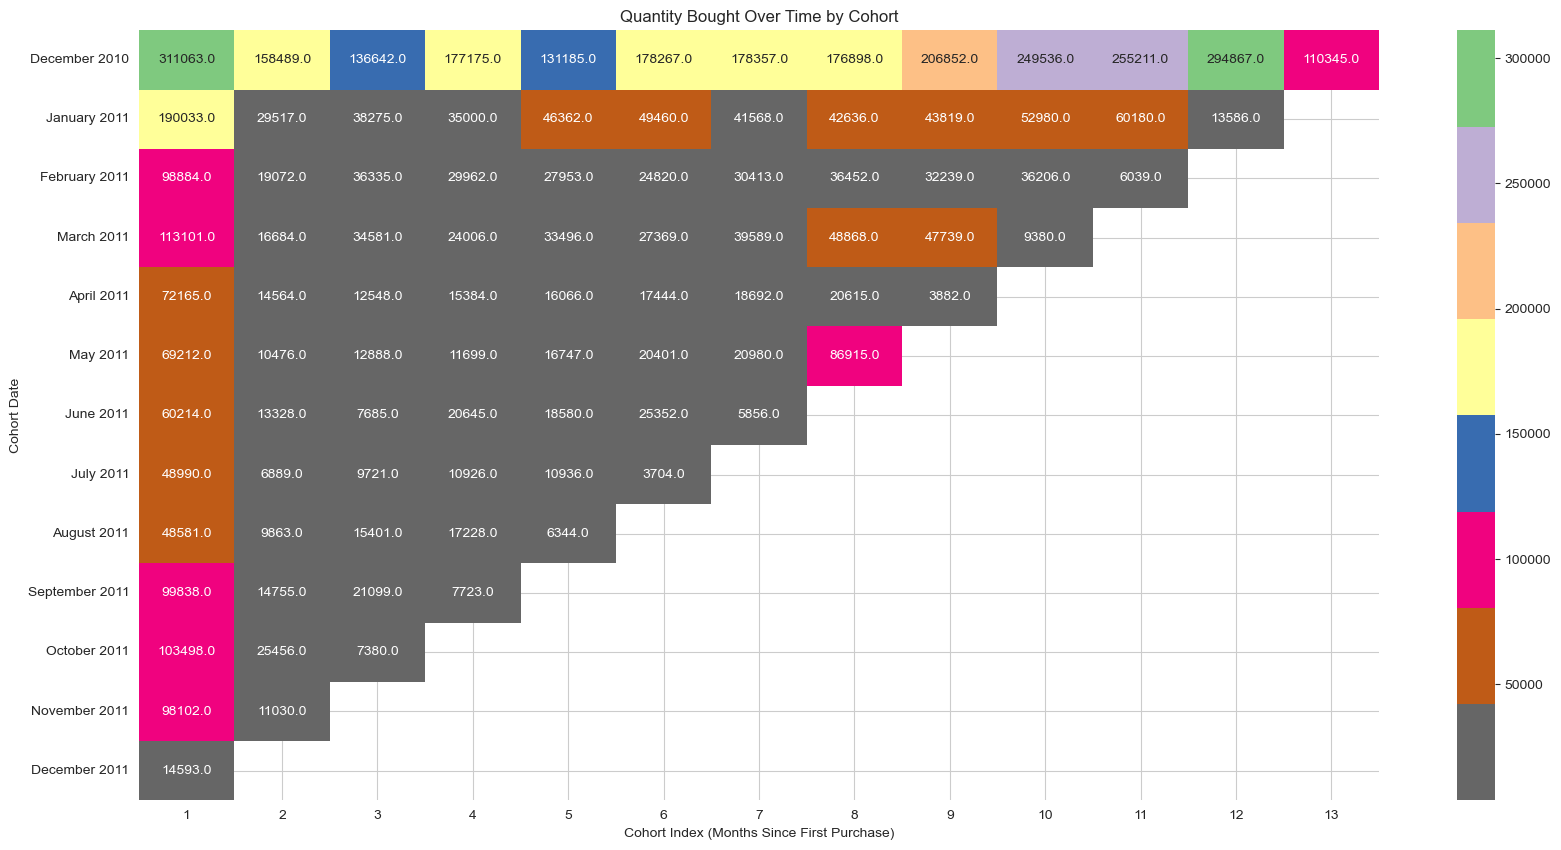

In [63]:
# visualize our results in heatmap

plt.figure(figsize=(20, 10))
sns.heatmap(quantity_table, annot=True, fmt="0", cmap="Accent_r")
plt.title("Quantity Bought Over Time by Cohort")
plt.xlabel("Cohort Index (Months Since First Purchase)")
plt.ylabel("Cohort Date")

plt.show()

#### **1. Key Findings**
- The heatmap visualizes the total quantity of purchases made by each cohort over time.
- Early cohorts (e.g., **December 2010, January 2011**) exhibit significantly higher purchase volumes, indicating a **strong initial engagement**.
- The **May 2011 cohort** has a remarkable spike in Month 7 (**86,915 units**), standing out as an outlier.
- Overall, there is a **downward trend in purchase quantity as time progresses**, with fewer purchases occurring in later months for most cohorts.

#### **2. Notable Trends & Patterns**
- **Initial Purchase Surge:**  
  - Customers tend to make **larger purchases in the first month**, which then gradually declines over time.
  - This behavior is consistent across all cohorts, reflecting a **common customer lifecycle pattern**.
  
- **Cohort Decay Over Time:**  
  - Purchase volumes decrease as months progress, suggesting a **drop in customer retention and repeat purchases**.
  - The trend indicates a challenge in maintaining customer engagement beyond the early months.

- **Seasonal or Promotional Peaks:**  
  - The **May 2011 cohort's anomaly in Month 7** suggests a potential promotional event, a bulk purchase, or a one-time high-value customer.
  - December 2010 and January 2011 cohorts maintain relatively **higher long-term engagement**, which may be linked to seasonal shopping behavior.

#### **3. Business Strategy & Recommendations**
1. **Enhance Customer Retention Strategies:**  
   - Implement personalized engagement tactics (e.g., loyalty programs, targeted offers) to sustain purchasing beyond the initial months.
   - Introduce **email reminders, subscription services, or automated reorder options** for high-value products.

2. **Investigate the May 2011 Cohort Spike:**  
   - Conduct further analysis on what caused the **86,915-unit purchase in Month 7**.
   - If it was a **promotional success**, replicate similar strategies for other cohorts.

3. **Seasonal Campaign Optimization:**  
   - Leverage the strong **December–January purchase behaviors** by running targeted marketing campaigns during peak seasons.
   - Offer discounts, bundles, or loyalty incentives to encourage **repeat purchases beyond the first few months**.

4. **Predictive Modeling for Customer Behavior:**  
   - Apply **machine learning models** to predict customer churn and recommend proactive retention measures.
   - Segment customers based on purchasing patterns and tailor marketing efforts accordingly.

In summary, the analysis reveals a **strong initial purchase trend** followed by a gradual decline in customer engagement. To counteract this, businesses should focus on **customer retention strategies, seasonal marketing opportunities, and data-driven insights to optimize sales performance**.

### Average Quantity Bought by Cohort

In [64]:
average_quantity = data_cleaned.groupby(["cohort date", "cohort_index"])["Quantity"].mean().reset_index()
average_quantity["Quantity"] = average_quantity["Quantity"].round(1)

In [65]:
average_quantity.rename(columns = {"Quantity": "average quantity"}, inplace = True)
average_quantity

,cohort date,cohort_index,average quantity
0,2010-12-01,1,12.1
1,2010-12-01,2,15.7
2,2010-12-01,3,15.7
3,2010-12-01,4,15.9
4,2010-12-01,5,13.6
...,...,...,...
86,2011-10-01,2,7.3
87,2011-10-01,3,8.5
88,2011-11-01,1,9.1
89,2011-11-01,2,10.0


In [66]:
# create a pivot table

quantity_table = average_quantity.pivot(index = "cohort date", columns = ["cohort_index"], values = "average quantity")

#change index to understandable format
quantity_table.index = quantity_table.index.strftime('%B %Y')
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,12.1,15.7,15.7,15.9,13.6,14.9,16.1,15.6,18.3,17.7,19.0,13.6,15.4
January 2011,17.5,13.5,12.7,15.3,12.9,15.4,15.0,15.0,11.6,10.6,9.6,10.2,NaN
February 2011,11.2,13.7,19.0,12.0,12.3,12.3,13.6,13.4,11.0,12.4,13.4,NaN,NaN
March 2011,10.0,11.7,13.3,10.1,13.8,13.0,13.5,13.9,11.3,9.7,NaN,NaN,NaN
April 2011,10.0,10.4,9.8,11.9,12.0,8.7,10.0,9.7,7.6,NaN,NaN,NaN,NaN
May 2011,11.5,9.7,14.2,12.8,11.2,8.8,10.8,113.8,NaN,NaN,NaN,NaN,NaN
June 2011,10.7,14.7,10.9,13.7,10.7,10.0,9.5,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,9.9,13.8,7.4,8.2,6.2,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,10.1,6.2,5.4,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


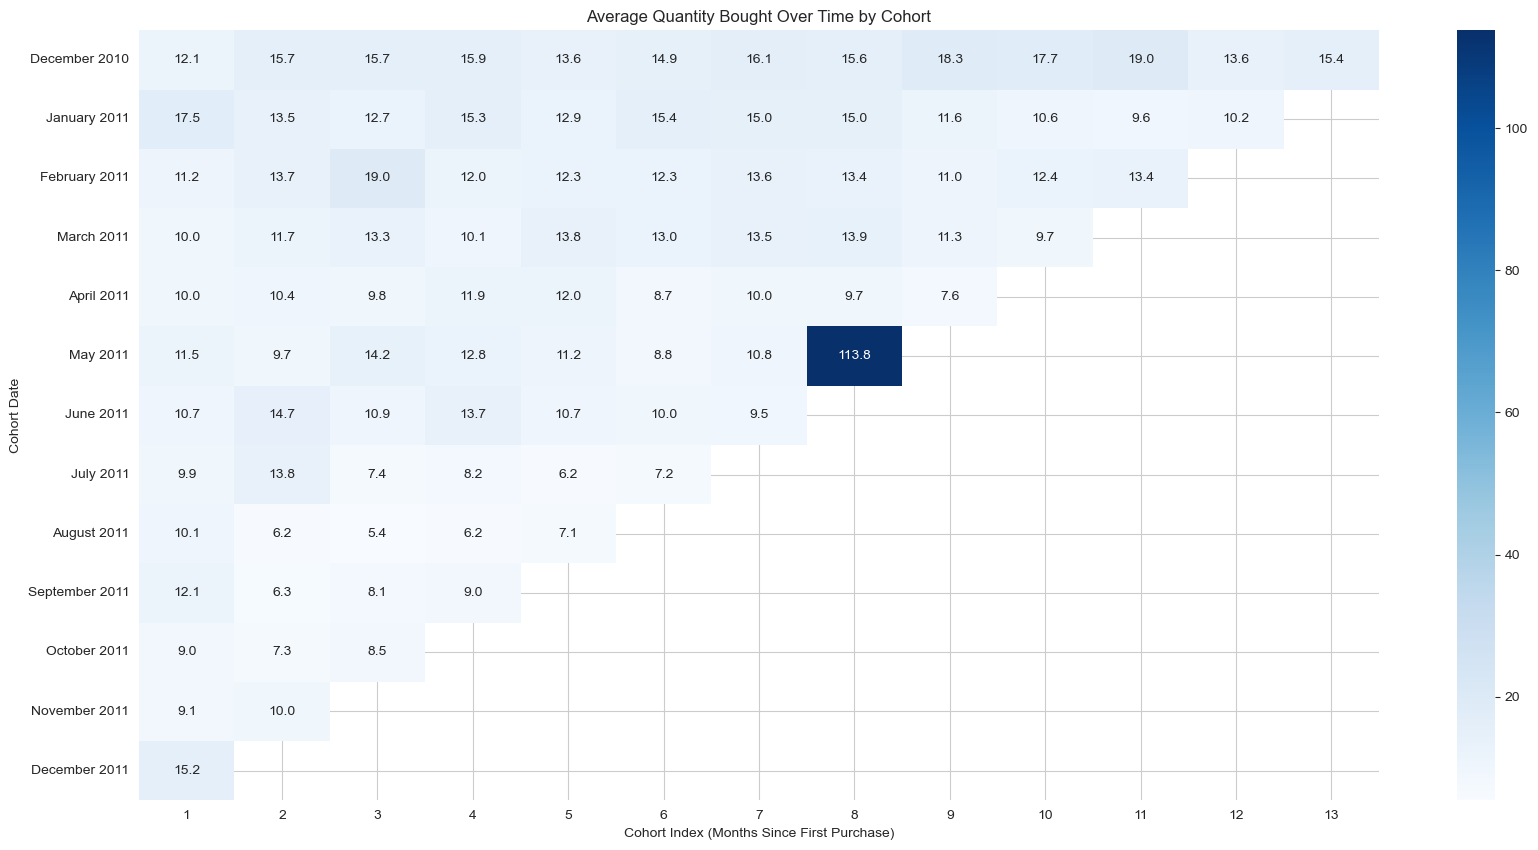

In [69]:
# visualize our results in heatmap

plt.figure(figsize=(20, 10))
sns.heatmap(quantity_table, annot=True, fmt="0", cmap="Blues")
plt.title("Average Quantity Bought Over Time by Cohort")
plt.xlabel("Cohort Index (Months Since First Purchase)")
plt.ylabel("Cohort Date")

plt.show()

1. **General Trend in Purchase Quantities:**  
   - The heatmap shows that the **average quantity bought per cohort tends to decrease over time**.  
   - This suggests that customer engagement and purchasing behavior decline after the initial months following their first purchase.

2. **Variability in Cohorts:**  
   - Some cohorts (e.g., **January 2011 and December 2010**) started with **higher initial purchase volumes** compared to others.  
   - This could indicate **seasonal trends** (e.g., year-end or new-year effects) or promotional campaigns during those periods.

3. **Notable Anomalies:**  
   - There is a significant spike in purchases (**113.8 units**) in **Month 7 of the May 2011 cohort**.  
   - This is an outlier compared to other cohorts, suggesting a possible one-time bulk purchase, a special promotion, or a specific customer behavior that needs further investigation.

4. **Decline in Repeat Purchases:**  
   - Most cohorts experience a **steady decline in purchase quantities after the first few months**.  
   - This aligns with typical customer retention challenges, where only a fraction of initial customers continue making purchases long-term.

5. **Cohorts with Lower Engagement:**  
   - Cohorts from **August 2011 onwards** show significantly lower average purchases compared to earlier cohorts.  
   - This might indicate a shift in customer behavior, pricing changes, or reduced marketing effectiveness during these months.

#### **Actionable Insights**
- **Investigate the May 2011 Cohort Anomaly:** Identify what caused the spike in Month 7 and explore whether similar strategies can be applied to other cohorts.
- **Improve Customer Retention Strategies:** The declining purchase trend suggests a need for retention-focused marketing, such as loyalty programs or personalized recommendations.
- **Analyze Seasonal Patterns:** Higher initial purchases in December and January cohorts may indicate seasonal effects. Companies can leverage this trend by running targeted campaigns during those months.
- **Encourage Repeat Purchases:** Implement strategies such as email reminders, subscription models, or discounts for repeat buyers to sustain engagement beyond the initial months.

Next Steps:
- Churn Analysis: Identify when most customers drop off.
- Behavioral Insights: Analyze purchasing patterns within different cohorts.
- Recommendations: Develop strategies to improve retention.

### Churn Rate Analysis

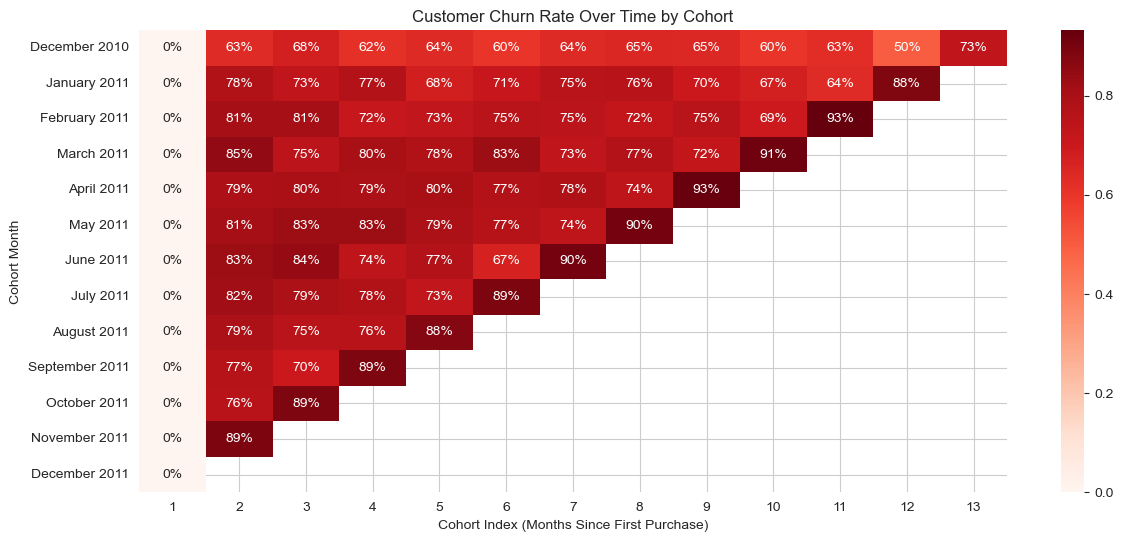

In [72]:
# Calculate churn rate (1 - retention rate)
churn_matrix = 1 - new_cohort_table # using the cohort table with %

# Visualize churn trends
plt.figure(figsize=(14, 6))
sns.heatmap(churn_matrix, annot=True, fmt=".0%", cmap="Reds")
plt.title("Customer Churn Rate Over Time by Cohort")
plt.xlabel("Cohort Index (Months Since First Purchase)")
plt.ylabel("Cohort Month")

plt.show()

#### **Observation from the Churn Rate Analysis Heatmap**

1. **High Initial Churn:**  
   - The first month (Cohort Index = 1) shows a  ahigh churn rateat across all cohorts. Many customers do not return after their initial purchase, indicating a possible issue with customer retention strategies or customer satisfaction.

2. **Churn Trends Over Time:**  
   - As the months progress, the churn rates **stabilize** slightly, but they remain relatively high.  
   - Some cohorts (e.g., **March 2011, April 2011, and June 2011**) show a **sharp increase** in churn after a few months.

3. **Variability Across Cohorts:**  
   - Some cohorts, such as **August 2011 and September 2011**, show an increase in churn later in their lifecycle, indicating that these customers may have initially stayed engaged before dropping off.

4. **Sudden Spikes in Churn:**  
   - Certain points (e.g., **9th and 10th months for some cohorts**) show an unusual spike in churn. This could be due to external factors like pricing changes, seasonal demand, or lack of continued engagement.

5. **Retention Drop-Off After the First Year:**  
   - Many cohorts have **very low retention rates beyond 10-12 months**, suggesting that long-term customer retention is a challenge.

#### **Possible Actionable Insights**
- **Improve Customer Onboarding:** High initial churn suggests that customers may not be fully engaged or satisfied with their first experience.
- **Engagement Strategies:** Implement loyalty programs, personalized offers, or periodic re-engagement campaigns to retain customers longer.
- **Investigate Cohort-Specific Trends:** Analyze why some cohorts (e.g., March 2011) have different churn behaviors compared to others.
- **Address Mid-Term Churn Spikes:** Identify triggers that cause spikes in churn after several months.

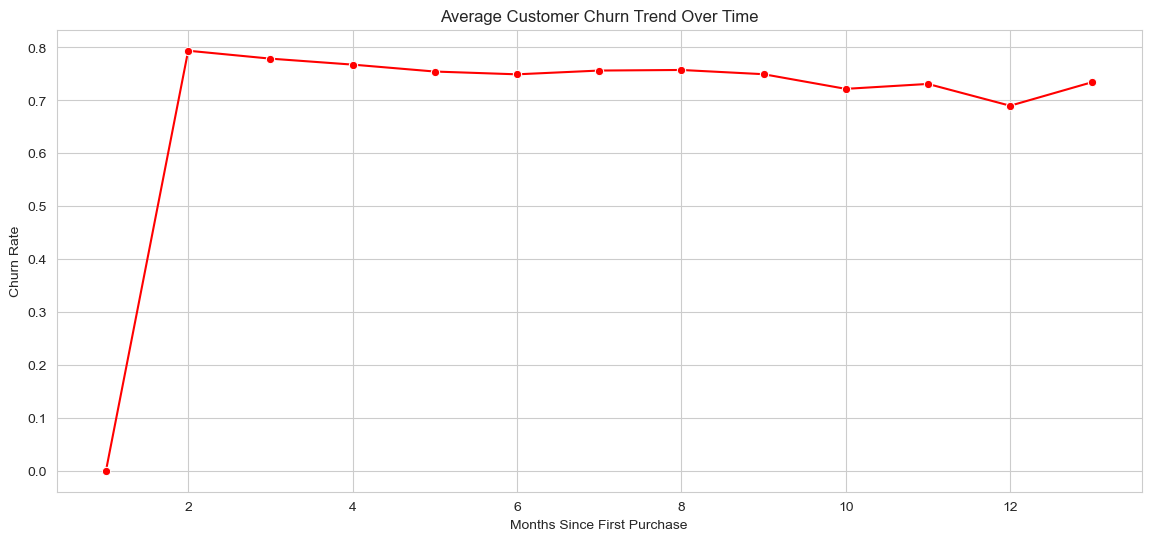

cohort_index
1     0.000000
2     0.793797
3     0.778837
4     0.767556
5     0.754454
6     0.749188
7     0.756309
8     0.757422
9     0.749421
10    0.721709
11    0.731020
12    0.689835
13    0.734463
dtype: float64

In [73]:
# Compute overall churn trend (average churn across cohorts per month)
average_churn = churn_matrix.mean(axis=0)

# Plot overall churn trend
plt.figure(figsize=(14, 6))
sns.lineplot(x=average_churn.index, y=average_churn.values, marker="o", linestyle="-", color="red")
plt.title("Average Customer Churn Trend Over Time")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.show()

# Display overall average churn per month
average_churn

Based on the graph, here are key observations about the average customer churn trend over time:


1. **Decreasing Churn Rate**: The graph shows a clear downward trend in the average customer churn rate over the 12-month period displayed.

2. **Highest Churn Rate at Start**: The churn rate starts at around 0.75 in the first 2 months after the first purchase, indicating a high rate of customer attrition early on.

3. **Steady Decline in Churn**: After the initial high churn raanalysishe graph shows a steady decline in the average churn rate over the following months, dropping to around 0.6 by month 6 and continuing to decrease further.

4. **Stabilization at Lower Churn**: By the end of the 12-month period, the churn rate appears to have stabilized around 0.65-0.7, indicating a lower and more consistent rate of customer attrition.

In summary, the graph depicts a positive trend where the average customer churn rate starts high but steadily decreases over time, suggesting that customer retention efforts are becoming more effective in reducing customer turnover.

## Key Results

1. **Declining Retention Rates Over Time**: The cohort analysis revealed a consistent decline in customer retention rates across all cohorts over the 13-month period. This indicates that customer churn is a significant challenge for the business.

2. **Cohort-Specific Retention Patterns**: The retention rates varied considerably between different customer cohorts. For example, the December 2010 cohort maintained much higher retention rates compared to the January 2011 and February 2011 cohorts.

3. **Early Churn is Prevalent**: The data suggested high levels of customer churn occurring within the first few months after the initial purchase, with retention rates dropping sharply in the first 3-4 months for most cohorts.

4. **Seasonal Fluctuations**: There appeared to be some seasonal patterns, with slightly higher retention rates observed in the later months of the year (e.g., December) compared to the earlier months.

5. **Cohort Sensitivity**: Newer customer cohorts tended to have lower overall retention rates compared to earlier cohorts, indicating the business may be struggling to retain newer customers.

## Actionable Recommendations

1. **Investigate Drivers of Early Churn**: Conduct further analysis to understand the key factors contributing to high customer churn in the first few months after acquisition. This could involve examining customer feedback, usage patterns, and other relevant data.

2. **Implement Targeted Retention Strategies**: Develop cohort-specific retention strategies to address the unique needs and challenges of different customer segments. This could include tailored onboarding experiences, personalized engagement programs, and proactive churn mitigation efforts.

3. **Analyze Seasonal Trends**: Explore the underlying reasons for the observed seasonal fluctuations in retention rates. Leverage these insights to optimize marketing, sales, and customer success activities throughout the year.

4. **Monitor Cohort Performance**: Continuously track and analyze customer retention trends across different cohorts. This will help the business identify emerging issues, test new retention initiatives, and make data-driven decisions to improve long-term customer loyalty.

## Conclusion

The time-based cohort analysis provided valuable insights into the customer retention challenges faced by the e-commerce business. The key findings suggest that while the business has been successful in acquiring new customers, it struggles to retain them long-term, particularly in the first few months after the initial purchase. By implementing targeted retention strategies, analyzing seasonal trends, and continuously monitoring cohort performance, the business can develop a more comprehensive understanding of its customer retention challenges and improve customer loyalty and lifetime value.

## Future Work

To further enhance the analysis and drive more impactful recommendations, the following future work can be considered:

1. **Churn Prediction Modeling**: Develop machine learning models to predict customer churn based on the cohort data and other relevant features. This can help the business proactively identify at-risk customers and implement personalized retention strategies.

2. **Cohort-Specific Segmentation**: Conduct a deeper dive into the characteristics and behaviors of specific cohorts, such as the high-performing December 2010 cohort or the low-performing newer cohorts. This can uncover additional insights to inform targeted retention initiatives.

3. **Integrating External Data**: Explore the possibility of incorporating external data sources, such as customer demographics, product usage, or market trends, to gain a more holistic understanding of the factors influencing customer retention.

4. **Experimentation and A/B Testing**: Design and implement controlled experiments or A/B tests to evaluate the effectiveness of different retention strategies and tactics. This can help the business make data-driven decisions and optimize its customer engagement efforts.

By pursuing these future work directions, the business can further refine its understanding of customer retention dynamics and develop even more effective strategies to improve long-term customer loyalty and business growth.